<h1 align="center"> Geico Mini Project </h1>

<h2> Introduction </h2>
GEICO provides a number of ways for its policyholders to make payments. While our service counselors can take payments over the phone, it is more cost-efficient for customers to make payments through our self-service channels such as online or through the automated phone system.  We would like to use a predictive model to select people to receive a pre-emptive e-mail message designed to encourage them to pay online.  
You have been tasked with identifying which customers are likely to make a service payment call in the next 5 days. The attached file contains data on customers who have had a bill due in the next 5 days and whether they made a service payment call. Construct a model that predicts the likelihood that each policyholder will make a service payment call (CALL_FLAG=1). You may use whatever methods you see fit. 
You may use any modeling package you choose to complete your analysis. Include any relevant work flow, code, or scripts you used.  

<h2> Our Tasks: </h2>
Summarize your data preparation, variable selection, modeling methods and fit statistics into a presentation. 

You should, at a minimum, 
- describe how you selected model inputs, 
- any data transformations preformed, 
- how you dealt with missing or extreme values, 
- reasons for your selected algorithm, 
- how your analysis addresses the business problem.



<h2> My Goals: </h2>

- Understand the provided data "ANON" and provide an analysis
- Analyze of features and preprocess the data such as smoothing, scaling, standardizing, generalizing, distribution, and finally construct new characterisitics if necessary
-	Detect and remove outlier from features
-	Understand imbalance dataset and mitigate overfitting and underfitting problem
-	Overview and determine approach handling of imbalance data using undersampling and oversampling
-	Build and optimize estimators in order to give accurate of estimation and finally classification of customers behavior

    



<h2> Outline of pipeline: </h2>

I. <b>Understanding data</b><br>
a) [Gather Sense of data](#understanding)<br>
b) [Data Cleaning](#cleaning)<br>
c) [Data Analysis](#analysis)<br>
<br>

II. <b>Preprocessing and Analyzing</b><br>
a) [Scaling](#scaling)<br>
b) [Distribution](#distribution)<br>
c) [Standardize](#standardize)<br>
d) [Splitting the Data](#splitting)<br><br>

III. <b>Resampling Method</b><br>
a) [Undersampling](#undersampling)<br>
b) [Correlation](#correlating)<br>
c) [Anomaly Detection](#anomaly)<br>
d) [Removing Outliers](#Outliers)<br>
c) [Dimensionality Reduction](#clustering)<br>

IV. <b>Building Machine Learning Model</b><br>
a) [Creating Estimators](#classifiers)<br>
b) [Hyper-parameterizing](#hyper)<br>
b) [Resampling Strategies](#strategies)<br>
f) [Cross-validation](#smote)<br><br>

V. <b>Testing </b><br>
a) [Performance Measurements](#testing)<br>



<h2> References: </h2>
<ul> 
<li>The Elements of Statistical Learning: Data Mining, Inference, and Prediction, Second Edition</li>
<li>Hands on Machine Learning with Scikit-Learn & TensorFlow by Aurélien Géron (O'Reilly).  </li>
<li><a src="https://imbalanced-learn.readthedocs.io/en/stable/api.html#module-imblearn" > Machine Learning - Imbalance Module - Python/ Scikit/ Scikit-Imblearn </a></li>
<li><a src="https://medium.com/learningdatascience/anomaly-detection-techniques-in-python-50f650c75aaf"> Anomaly Detection techniques in Python</a>  </li>
</ul>



In [1]:
import pylab
import calendar
from time import time
import collections
from collections import Counter

# Stats Modules
import numpy as np
from scipy.stats import norm
import pandas as pd

# Visualization Modules
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Preprocessing Modules
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, RobustScaler

# Imbalance learning Madules
from imblearn.under_sampling import (ClusterCentroids, RandomUnderSampler,
                                     NearMiss,
                                     InstanceHardnessThreshold,
                                     CondensedNearestNeighbour,
                                     EditedNearestNeighbours,
                                     RepeatedEditedNearestNeighbours,
                                     AllKNN,
                                     NeighbourhoodCleaningRule,
                                     OneSidedSelection)
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline

# Clustering Modules
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD


# Model Selection Modules
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_predict


# Models Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier


# Metrics Modules
from sklearn.metrics import (precision_score, recall_score, f1_score,
                             accuracy_score, classification_report, confusion_matrix,
                             average_precision_score, precision_recall_curve,
                             roc_curve, roc_auc_score, roc_auc_score)


# import missingno as msno
from datetime import datetime
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None
%matplotlib inline

<h2> Understanding data </h2>
<a id="understanding"></a>
The first thing that we must do is to have a basic knowledge and sense from the data. There are a few columns such as Tenure, Age, or Gender are making sense but majority of features are unknown therefore it is important to take a look at data and its description first to understand their type, min, max, mean and distribution of them.

Some columns in the dataset are “categorical data” which has categorical in nature represents discrete values which belong to a specific finite set of categories or classes., while some other “date” or “numeric” features. 

We need to understand there are several encoding schemes for dealing with categorical data. Being careless of handling and encoding them properly caused a large amount of features, therefore we need to aware of a couple of popular techniques for dealing with large scale feature explosion, often known as the “curse of dimensionality”.
Encoding schemes are including One-hot Encoding (bagging of categories within a feature and creating augmented features and adding to data table), Dummy coding scheme, Effect coding (replacing all zero row with -1), Bin-counting scheme, Feature hashing, … 

<a src="https://towardsdatascience.com/understanding-feature-engineering-part-2-categorical-data-f54324193e63"> [More information on Categorical Data] </a>

In [2]:
Data = pd.read_csv("ANON.csv")
print('Shape: ', Data.shape)
print()
print('Types of Columns', Data.dtypes)


Shape:  (130086, 29)

Types of Columns DATE_FOR                  object
RTD_ST_CD                 object
CustomerSegment           object
Tenure                   float64
Age                      float64
MART_STATUS               object
GENDER                    object
CHANNEL1_6M              float64
CHANNEL2_6M              float64
CHANNEL3_6M              float64
CHANNEL4_6M              float64
CHANNEL5_6M              float64
METHOD1_6M               float64
RECENT_PAYMENT           float64
PAYMENTS_6M              float64
CHANNEL1_3M                int64
CHANNEL2_3M                int64
CHANNEL3_3M                int64
CHANNEL4_3M                int64
CHANNEL5_3M                int64
METHOD1_3M                 int64
PAYMENTS_3M                int64
NOT_DI_3M                  int64
NOT_DI_6M                  int64
EVENT1_30_FLAG             int64
EVENT2_90_SUM              int64
LOGINS                     int64
POLICYPURCHASECHANNEL      int64
Call_Flag                  int64
dtyp

In [3]:
Data.head(3)

,DATE_FOR,RTD_ST_CD,CustomerSegment,Tenure,Age,MART_STATUS,GENDER,CHANNEL1_6M,CHANNEL2_6M,CHANNEL3_6M,...,CHANNEL5_3M,METHOD1_3M,PAYMENTS_3M,NOT_DI_3M,NOT_DI_6M,EVENT1_30_FLAG,EVENT2_90_SUM,LOGINS,POLICYPURCHASECHANNEL,Call_Flag
0,5/19/2014,ST_S0,1,16.175222,78.403833,MS_S0,F,0.0,0.0,1.0,...,2,0,3,0,0,0,0,0,0,0
1,5/17/2014,ST_S0,1,15.931554,70.989733,MS_S1,F,0.0,6.0,0.0,...,0,3,3,0,0,0,0,0,0,0
2,5/15/2014,ST_S0,1,15.937029,87.578371,MS_S2,M,0.0,0.0,10.0,...,0,0,6,0,0,0,0,0,0,0


In [4]:
Data.describe()

,Tenure,Age,CHANNEL1_6M,CHANNEL2_6M,CHANNEL3_6M,CHANNEL4_6M,CHANNEL5_6M,METHOD1_6M,RECENT_PAYMENT,PAYMENTS_6M,...,CHANNEL5_3M,METHOD1_3M,PAYMENTS_3M,NOT_DI_3M,NOT_DI_6M,EVENT1_30_FLAG,EVENT2_90_SUM,LOGINS,POLICYPURCHASECHANNEL,Call_Flag
count,130086.000000,130086.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,...,130086.000000,130086.000000,130086.00000,130086.000000,130086.000000,130086.0,130086.000000,130086.000000,130086.000000,130086.000000
mean,8.583048,48.842201,0.261810,0.948467,0.811652,0.401216,0.569823,1.834425,0.105680,4.848333,...,0.283559,0.908806,2.41205,0.055671,0.080009,0.0,0.193349,0.948326,0.130675,0.036622
std,7.297112,14.038089,1.092346,1.880123,1.824188,1.065413,1.628655,2.596754,0.307429,2.027548,...,0.847804,1.386168,1.22286,0.229286,0.271308,0.0,0.509199,2.143749,0.337046,0.187832
min,0.032854,16.689938,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,3.249829,37.878166,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,...,0.000000,0.000000,2.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,7.006160,49.147159,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,...,0.000000,0.000000,3.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,11.610540,58.858316,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,0.000000,6.000000,...,0.000000,2.000000,3.00000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000
max,63.091034,99.348392,12.000000,53.000000,26.000000,18.000000,29.000000,53.000000,1.000000,53.000000,...,16.000000,36.000000,36.00000,1.000000,1.000000,0.0,4.000000,45.000000,1.000000,1.000000


#### Data Cleaning
<a id="cleaning"></a>
We need to see whether there is a column contains suspicious value or no any value. Remember the goal is to reduce the unnecessary features as much as possible in this step. We can see column “EVENT1_30_FLAG” has no value, therefore we need to simply drop it.

Also there are many cells of table consist of no value a.k.a NaN. Exploring in different columns, we can see “CustomerSegment” has a category of NONE, which I would rather not to change it. But there are many missing points in columns called CHANNELX_YM, which considered as NaN.
Removing them doesn’t hurt our analysis, since number of our target feature “Call_Flage” will not be reduced too much percentage wise.


In [5]:
# EVENT1_30_FLAG all zero
Data.drop(columns='EVENT1_30_FLAG', inplace=True)


# get the number of missing data points per column
missing_values_count = Data.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:10]
Columns = ['DATE_FOR', 'RTD_ST_CD', 'CustomerSegment', 'Tenure', 'Age',  'MART_STATUS', 'GENDER',
                       'CHANNEL1_6M', 'CHANNEL2_6M', 'CHANNEL3_6M', 'CHANNEL4_6M', 'CHANNEL5_6M',
                       'METHOD1_6M', 'RECENT_PAYMENT', 'PAYMENTS_6M', 'CHANNEL1_3M', 'CHANNEL2_3M',
                       'CHANNEL3_3M', 'CHANNEL4_3M', 'CHANNEL5_3M', 'METHOD1_3M', 'PAYMENTS_3M',
                       'NOT_DI_3M', 'NOT_DI_6M', 'EVENT2_90_SUM', 'LOGINS',
                       'POLICYPURCHASECHANNEL', 'Call_Flag'
                       ]
Continuous_Columns = ['Tenure', 'Age']
Categorical_Columns = ['DATE_FOR', 'RTD_ST_CD', 'CustomerSegment', 'MART_STATUS', 'GENDER',
                       'CHANNEL1_6M', 'CHANNEL2_6M', 'CHANNEL3_6M', 'CHANNEL4_6M', 'CHANNEL5_6M',
                       'METHOD1_6M', 'RECENT_PAYMENT', 'PAYMENTS_6M', 'CHANNEL1_3M', 'CHANNEL2_3M',
                       'CHANNEL3_3M', 'CHANNEL4_3M', 'CHANNEL5_3M', 'METHOD1_3M', 'PAYMENTS_3M',
                       'NOT_DI_3M', 'NOT_DI_6M', 'EVENT2_90_SUM', 'LOGINS',
                       'POLICYPURCHASECHANNEL', 'Call_Flag'
                       ]
# looking at kinds of data in each column
if False:
    for col in Data_onehot.columns:
        kinds = Data_onehot[col].astype('category').cat.categories.to_list()
        print(col, '    with total number of kind: ', len(kinds), '\nwith set of: ', kinds)
        if False:
            for i in kinds:
                item_sum = (Data_onehot[col] == i).sum()
                if item_sum > 0:
                    print(i, 'number of item: ', item_sum)
        print()


In our case the Call_Flage ==1 reduces from 4764 to 4725 and Call_Flage ==0 from 125322 to 124552.
Also there is a column “RTD_ST_CD” contains categorical data of 50 kind of text. I preferred not to use regular encoding function to generate more unnecessary features and manually convert them to a relevant number using a replacement python dictionary. Also the same conversion for “CustomerSegment”, “MART_STATUS”, and “GENDER”.

Other categorical columns values will remain the same.

In [6]:
Data_bkp = Data.copy()
# replacing nan
# since it doesn't hurt us by removing the nan values from table
# the class==1 from 4764 to 4725
# and class==0 from 125322 to 124552
Data.dropna(inplace=True)

# The reason not using pd.get_dummies() in order to one-hot encoding of the data is, it creates 
# a lot of unnaccassary columns which makes the data very sparse and increase dimensions.
# I chose to convert the columns by hand in order to avoid further complexities
date_to_int = (lambda x: int(x.split('/')[1]))
dates = Data['DATE_FOR'].astype('category').cat.categories.to_list()
replace_map = {'DATE_FOR': {date: date_to_int(date) for date in dates}}

replace_map.update({'RTD_ST_CD':
                   {'ST_S25': 25, 'ST_S35': 35, 'ST_S47': 47, 'ST_S40': 40, 'ST_S30': 30, 'ST_S37': 37,
                    'ST_S29': 29, 'ST_S27': 27, 'ST_S44': 44, 'ST_S7': 7, 'ST_S23': 23, 'ST_S12': 12, 'ST_S10': 10,
                    'ST_S19': 19, 'ST_S21': 21, 'ST_S16': 16, 'ST_S36': 36, 'ST_S46': 46, 'ST_S41': 41, 'ST_S13': 13,
                    'ST_S26': 26, 'ST_S17': 17, 'ST_S32': 32, 'ST_S50': 50, 'ST_S38': 38, 'ST_S24': 24, 'ST_S39': 39,
                    'ST_S1': 1, 'ST_S22': 22, 'ST_S14': 14, 'ST_S4': 4, 'ST_S6': 6, 'ST_S0': 0, 'ST_S28': 28,
                    'ST_S49': 49, 'ST_S8': 8, 'ST_S2': 2, 'ST_S3': 3, 'ST_S48': 48, 'ST_S31': 31, 'ST_S5': 5,
                    'ST_S45': 45, 'ST_S34': 34, 'ST_S43': 43, 'ST_S33': 33, 'ST_S20': 20, 'ST_S42': 42, 'ST_S11': 11,
                    'ST_S9': 9, 'ST_S18': 18, 'ST_S15': 15},
               'CustomerSegment':
                   {'2': 2, '1': 1, 'NONE': 0, '3': 3},
               'MART_STATUS':
                   {'MS_S3': 3, 'MS_S4': 4, 'MS_S1': 1, 'MS_S0': 0, 'MS_S2': 2},
               'GENDER':
                   {'F': 0, 'M': 1},
               })
# replace dict in df
Data.replace(replace_map, inplace=True)

for cat in Categorical_Columns:
    if cat not in ['DATE_FOR', 'RTD_ST_CD', 'CustomerSegment', 'MART_STATUS', 'GENDER']:
        labels = Data[cat].astype('category').cat.categories.to_list()
        # check if the labels are not integer
        if type(labels[0]) != type(int(labels[0])):
            tmp_dict = {cat: {k: v for k, v in zip(labels, [int(i) for i in labels])}}
        replace_map.update(tmp_dict)
        # print(tmp_dict)
        Data[cat].map(tmp_dict)
        # print(Data[cat])

# Make sure to convert all digits to int
# Data.iloc[:, 1:] = Data.iloc[:, 1:].astype(int)
Data = Data.astype(int)
Data.describe()

Data_trns = Data.copy()


### Data Analysis
<a id="analysis"></a>
**Note:** Notice how imbalanced is our original dataset! Most of the customers Call_Flag are zero. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most of our data for No Call_Flag. We will see how we would mitigate this problem later.

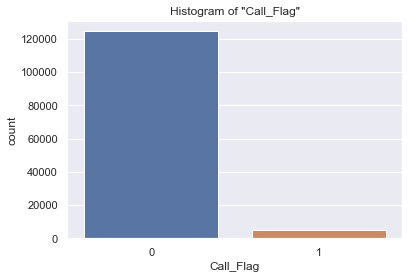

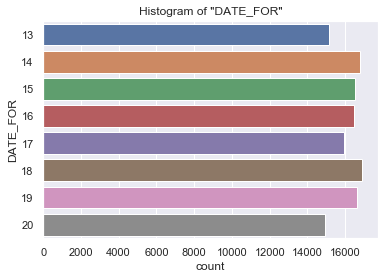

In [7]:
def sns_countplot(df, cat, orient='v'):
    colors = ["#0101DF", "#DF0101"]
    sns.set(style='darkgrid')
    if orient=='v':
        ax = sns.countplot(x=cat, data=df)#, palette=colors)
    elif orient == 'h':
        ax = sns.countplot(y=cat, data=df)
    plt.title('Histogram of "{cat}"'.format(cat = cat), fontsize=12)
#     for p in ax.patches:
    #     ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
    #                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')
#         ax.annotate('{:.1f}%'.format((100 * p.get_height() / len(df))), (p.get_x() + 0.1, p.get_height() + 5))

    plt.show()

if True:
    sns_countplot(Data, 'Call_Flag')
    sns_countplot(Data.sort_values(by=['DATE_FOR']), 'DATE_FOR', orient='h')


## Preprocessing and Analyzing
### Scaling Data
<a id="scaling"></a>
There are multiple options for scaling features. Many machine learning algorithms work better when features are on a relatively similar scale and close to normally distributed. MinMaxScaler, RobustScaler, StandardScaler, and Normalizer are scikit-learn methods to preprocess data for machine learning. Which method you need, if any, depends on your model type and your feature values.

**- MinMaxScaler:** For each value in a feature, MinMaxScaler subtracts the minimum value in the feature and then divides by the range. The range is the difference between the original maximum and original minimum.

**- RobustScaler:** RobustScaler transforms the feature vector by subtracting the median and then dividing by the interquartile range (75% value — 25% value).

**- StandardScaler:** StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation.

**- Normalizer:** Normalizer works on the rows, not the columns! By default, L2 normalization is applied to each observation so the that the values in a row have a unit norm. Unit norm with L2 means that if each element were squared and summed, the total would equal 1. Alternatively, L1 (aka taxicab or Manhattan) normalization can be applied instead of L2 normalization.


In this approach, we don't need more than MinMax scaling, although the code has been implemented and the result for all of them have been compared, I observed that there is no significant improvement over other approaches.

For more info on Scaling Data : https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02

In [8]:

# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)


Data_scl = Data.copy()


### Standard Scaling
if False:
    std_scaler = StandardScaler()
    Data_scl['std_scaled_age'] = std_scaler.fit_transform(Data['Age'].values.reshape(-1,1))
    Data_scl['std_scaled_tenure'] = std_scaler.fit_transform(Data['Tenure'].values.reshape(-1,1))
    if True:
        fig, ax = plt.subplots(1, 2, figsize=(18, 4))
        amount_val = Data_scl['std_scaled_age']
        time_val = Data_scl['std_scaled_tenure']
        sns.distplot(amount_val, ax=ax[0], color='r')
        ax[0].set_title('Distribution of Age', fontsize=14)
        ax[0].set_xlim([min(amount_val), max(amount_val)])
        sns.distplot(time_val, ax=ax[1], color='b')
        ax[1].set_title('Distribution of Tenure', fontsize=14)
        ax[1].set_xlim([min(time_val), max(time_val)])
        plt.show()

### RobustScaler is less prone to outliers.
if False:
    rob_scaler = RobustScaler()
    for col in Data_scl.columns:
        Data_scl[col] = rob_scaler.fit_transform(Data_scl[col].values.reshape(-1, 1))

## Scaling within -1 and 1
min_max_scalar = MinMaxScaler()
min_max_np = min_max_scalar.fit_transform(Data_scl)
for i, col in enumerate(Data_scl.columns):
    Data_scl[col] = min_max_np[:, i]

Data = Data_scl.copy()



### Distribution
<a id="distribution"></a>
We also can see the distribution diagram of different columns of our dataset. It gives some more intuitions.

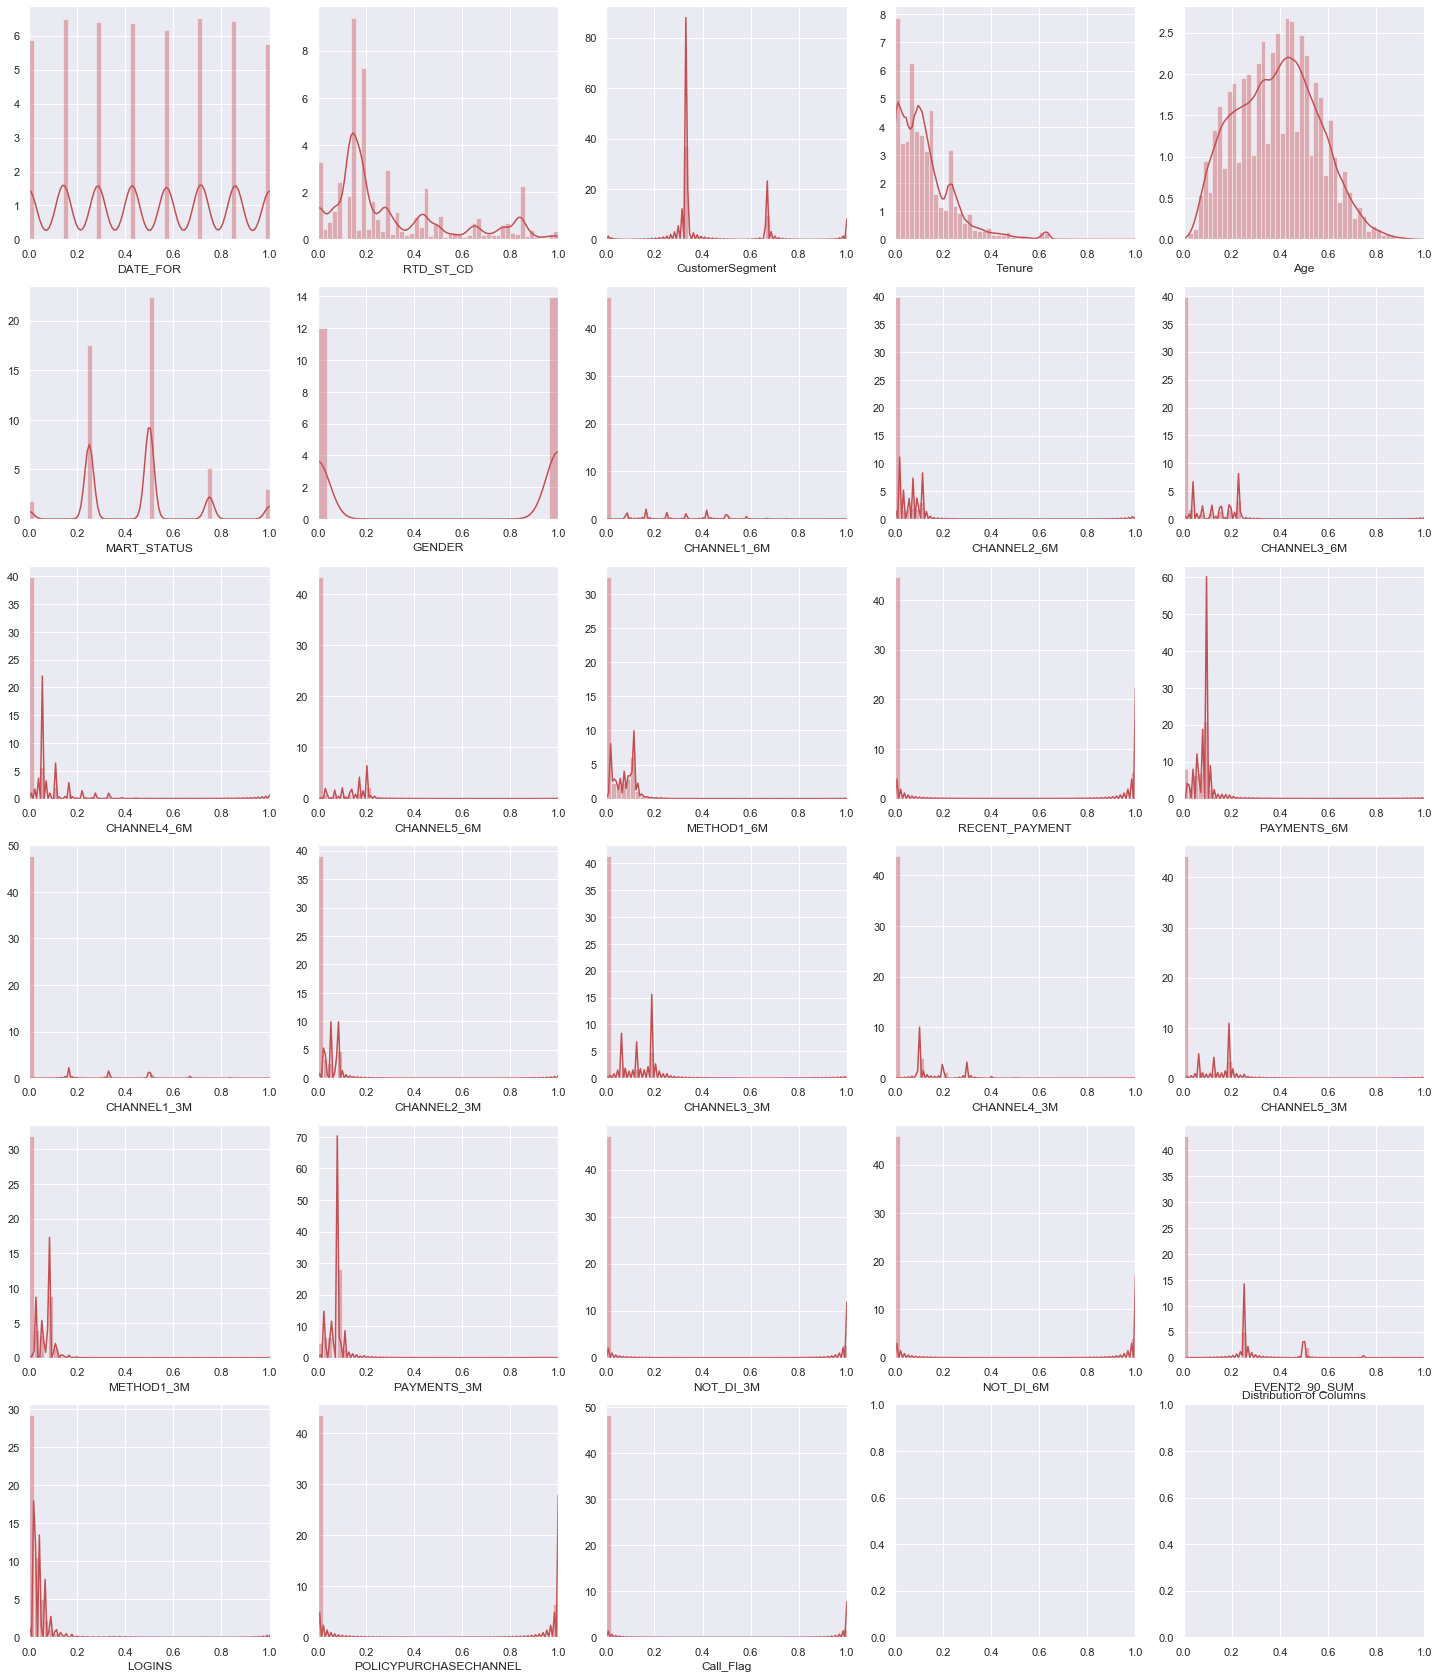

In [9]:
# Data_scl.drop(['Age','Tenure'], axis=1, inplace=True)
# see distribution ofter scl
def sns_hist_plot(df, columns=None, n_row=1, n_col=1, figsize=(10,4)):
    try:
        if isinstance(columns, object):
            columns = df.columns
    except:
        pass

    n_row = n_row
    n_col = n_col
    fig, ax = plt.subplots(n_row, n_col, figsize=figsize)
    counter = 0
    for col in columns:
        r = counter // n_col
        c = counter % n_col
        col_val = df[col]
        sns.distplot(col_val, ax=ax[r][c], color='r')
        #         ax[r][c].set_title(col, fontsize=14)
        ax[r][c].set_xlim([min(col_val), max(col_val)])
        # time_val = Data_scl['rob_scaled_tenure']
        # sns.distplot(time_val, ax=ax[1], color='b')
        # ax[1].set_title('Distribution of Tenure', fontsize=14)
        # ax[1].set_xlim([min(time_val), max(time_val)])
        counter += 1
    plt.title('Distribution of Columns')
    plt.show()

sns_hist_plot(df=Data_scl, columns=Data_scl.columns,n_row=6, n_col=5, figsize=(25,30))


### Standardize
<a id="standardize"></a>

**Distributions:** Let's take a look at the distribution of selected columns Age and Tenure. By seeing the distributions we can have an idea how skewed are these features, we can also see further distributions of the other features. There are techniques that can help the distributions be less skewed which will be implemented later.

Below we see a comparison on distributions for both MinMax Scalar and Standard Scalar. There is no significant change as we discussed earlier.

In [10]:
Data_std = Data.copy()

sc_X = StandardScaler() # created an object with the scaling class
# Data_std.iloc[:, 1:] = sc_X.fit_transform(Data.iloc[:, 1:])  # Here we fit and transform the X_train matrix
np_std = sc_X.fit_transform(np.array(Data))
for i, col in enumerate(Data.columns):
    Data_std[col] = np_std[:,i]

# Data = Data_std.copy()

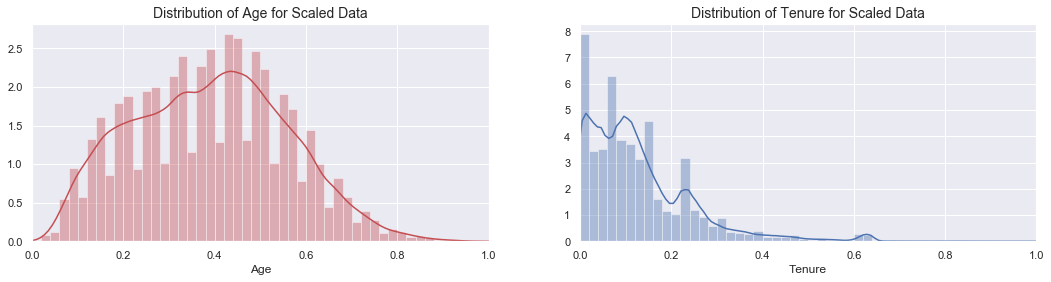

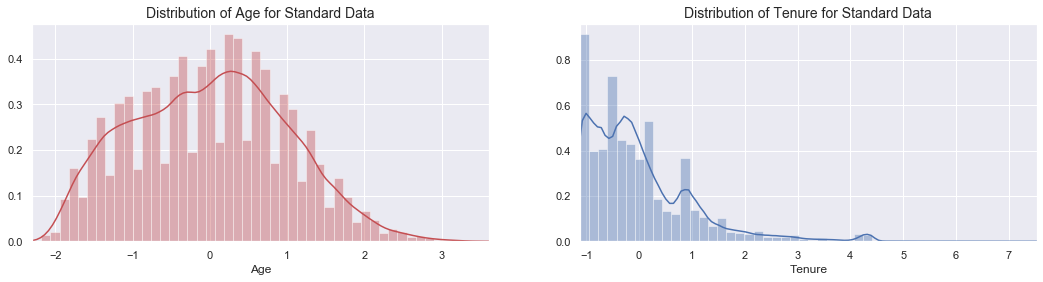

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(18, 4))
col_val = Data_scl['Age']
sns.distplot(col_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Age for Scaled Data', fontsize=14)
ax[0].set_xlim([min(col_val), max(col_val)])
col_val = Data_scl['Tenure']
sns.distplot(col_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Tenure for Scaled Data', fontsize=14)
ax[1].set_xlim([min(col_val), max(col_val)])
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(18, 4))
col_val = Data_std['Age']
sns.distplot(col_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Age for Standard Data', fontsize=14)
ax[0].set_xlim([min(col_val), max(col_val)])
col_val = Data_std['Tenure']
sns.distplot(col_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Tenure for Standard Data', fontsize=14)
ax[1].set_xlim([min(col_val), max(col_val)])
plt.show()

### Splitting Data
<a id="splitting"></a>

In [12]:
# Splitting Data Before undersampling

print('Call_Flag=0', round(Data['Call_Flag'].value_counts()[0]/len(Data) * 100,2), '% of the dataset')
print('Call_Flag=1', round(Data['Call_Flag'].value_counts()[1]/len(Data) * 100,2), '% of the dataset')

X = Data.drop('Call_Flag', axis=1)
y = Data['Call_Flag']

skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in skf.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels


# Turn into an array
X_train_org = X_train.values
X_test_org = X_test.values
y_train_org = y_train.values
y_test_org = y_test.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(y_train, return_counts=True)
test_unique_label, test_counts_label = np.unique(y_test, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(y_train))
print(test_counts_label/ len(y_test))

Call_Flag=0 96.35 % of the dataset
Call_Flag=1 3.65 % of the dataset
Train: [ 25632  25633  25634 ... 129274 129275 129276] Test: [    0     1     2 ... 32738 32752 32762]
Train: [     0      1      2 ... 129274 129275 129276] Test: [25632 25633 25634 ... 68975 68988 69025]
Train: [     0      1      2 ... 129274 129275 129276] Test: [51271 51272 51273 ... 92968 93017 93021]
Train: [     0      1      2 ... 129274 129275 129276] Test: [ 76901  76902  76903 ... 113919 113992 114043]
Train: [     0      1      2 ... 113919 113992 114043] Test: [102926 102927 102928 ... 129274 129275 129276]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.96345072 0.03654928]
[0.96345001 0.03654999]


## Resampling Method
### Underampling
<a id="undersampling"></a>

There are techniques which are using for imbalanced data.

1-	Performance Metric: Since imbalanced data doesn’t show homogeneity with data samples, therefore using performance metric is critical, there are many examples that only using accuracy will be failing during evaluating of performance of the trained model. Therefore it is necessary to use different types of metrics such as confusion matrix, precision, recall, F1-score, or using visualization methods such as ROC-curve and AUC measurements.


2-	ML Algorithm: As a rule of thumb it is always good to try variety of algorithms, specially dealing with imbalanced data, tree-based algorithms such as decision tree or random forest, usually perform better than other, since the algorithm doesn’t take the number of samples into account, but the work by learning a hierarchy of data based on measuring entropy among features. Therefore they force both classes to be addressed equally. Improvement of F1 and recall is being addressed by random forest over other types such as logistic regression or SVM.


3-	Resampling techniques: it falls into three categories of algorithms. First is undersampling technique, which refers to reducing the size of majority class to be equal to the minority. Second is oversampling, by producing synthetic data points and add them into minority class to be equal to majority class. Third is hybrid approach using both undersampling and oversampling techniques. Note, that we need to be careful of splitting data before resampling the data which can cause leakage of information during train of machine learning model.


**Note:** There are common mistakes that data scientists are dealing with imbalanced dataset:
-	We need to isolate test set from resampled (undersampled or oversampled) dataset to prevent common problem called “information leakage”
-	When training model using cross-validation, resampling(undersampling or oversampling) must be occurred during cross validation over training dataset
-	Always being aware of “accuracy” to measure the performance of model. It can be completely misleading measurement. Therefore it is better to use other metrics such as confusion matrix, precision, recall, F1-score.

More Info:
https://imbalanced-learn.readthedocs.io/en/stable/api.html#module-imblearn


In [13]:
X = Data.drop('Call_Flag', axis=1)
y = Data['Call_Flag']
# sampler = RepeatedEditedNearestNeighbours()
# sampler = EditedNearestNeighbours()
# sampler = AllKNN(allow_minority=True)
sampler = RandomUnderSampler()
X_res, y_res = sampler.fit_resample(X,y)

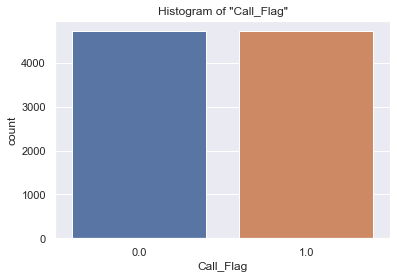

In [14]:
new_df = pd.concat([X_res, y_res], axis=1)
sns_countplot(new_df, 'Call_Flag')

### Correlation Matrices
<a id="correlating"></a>
Correlation matrices are the essence of understanding data. 
We use it to understand the impact of features on the target class. It is important for us to select the most important features which have the most impact(positive or negative correlation) on the target class.

#### More Explanation:

-   **Negative Correlations:** CHANNEL5_6M, CHANNEL5_3M, CHANNEL3_6M, CHANNEL3_3M, LOGINS, PAYMENTS_6M, PAYMENTS_3M, POLICYPURCHASECHANNEL, and RECENT_PAYMENT are negatively correlated. Notice how the lower these values are, the more likely the end result will be a Call_Flag equals to 0.
-   **Positive Correlations:** CHANNEL4_6M, CHANNEL4_3M, and METHOD1_6M are positively correlated to Call_Flag. Notice how the higher these values are, the more likely the end result will be a Call_Flag equals to 1.


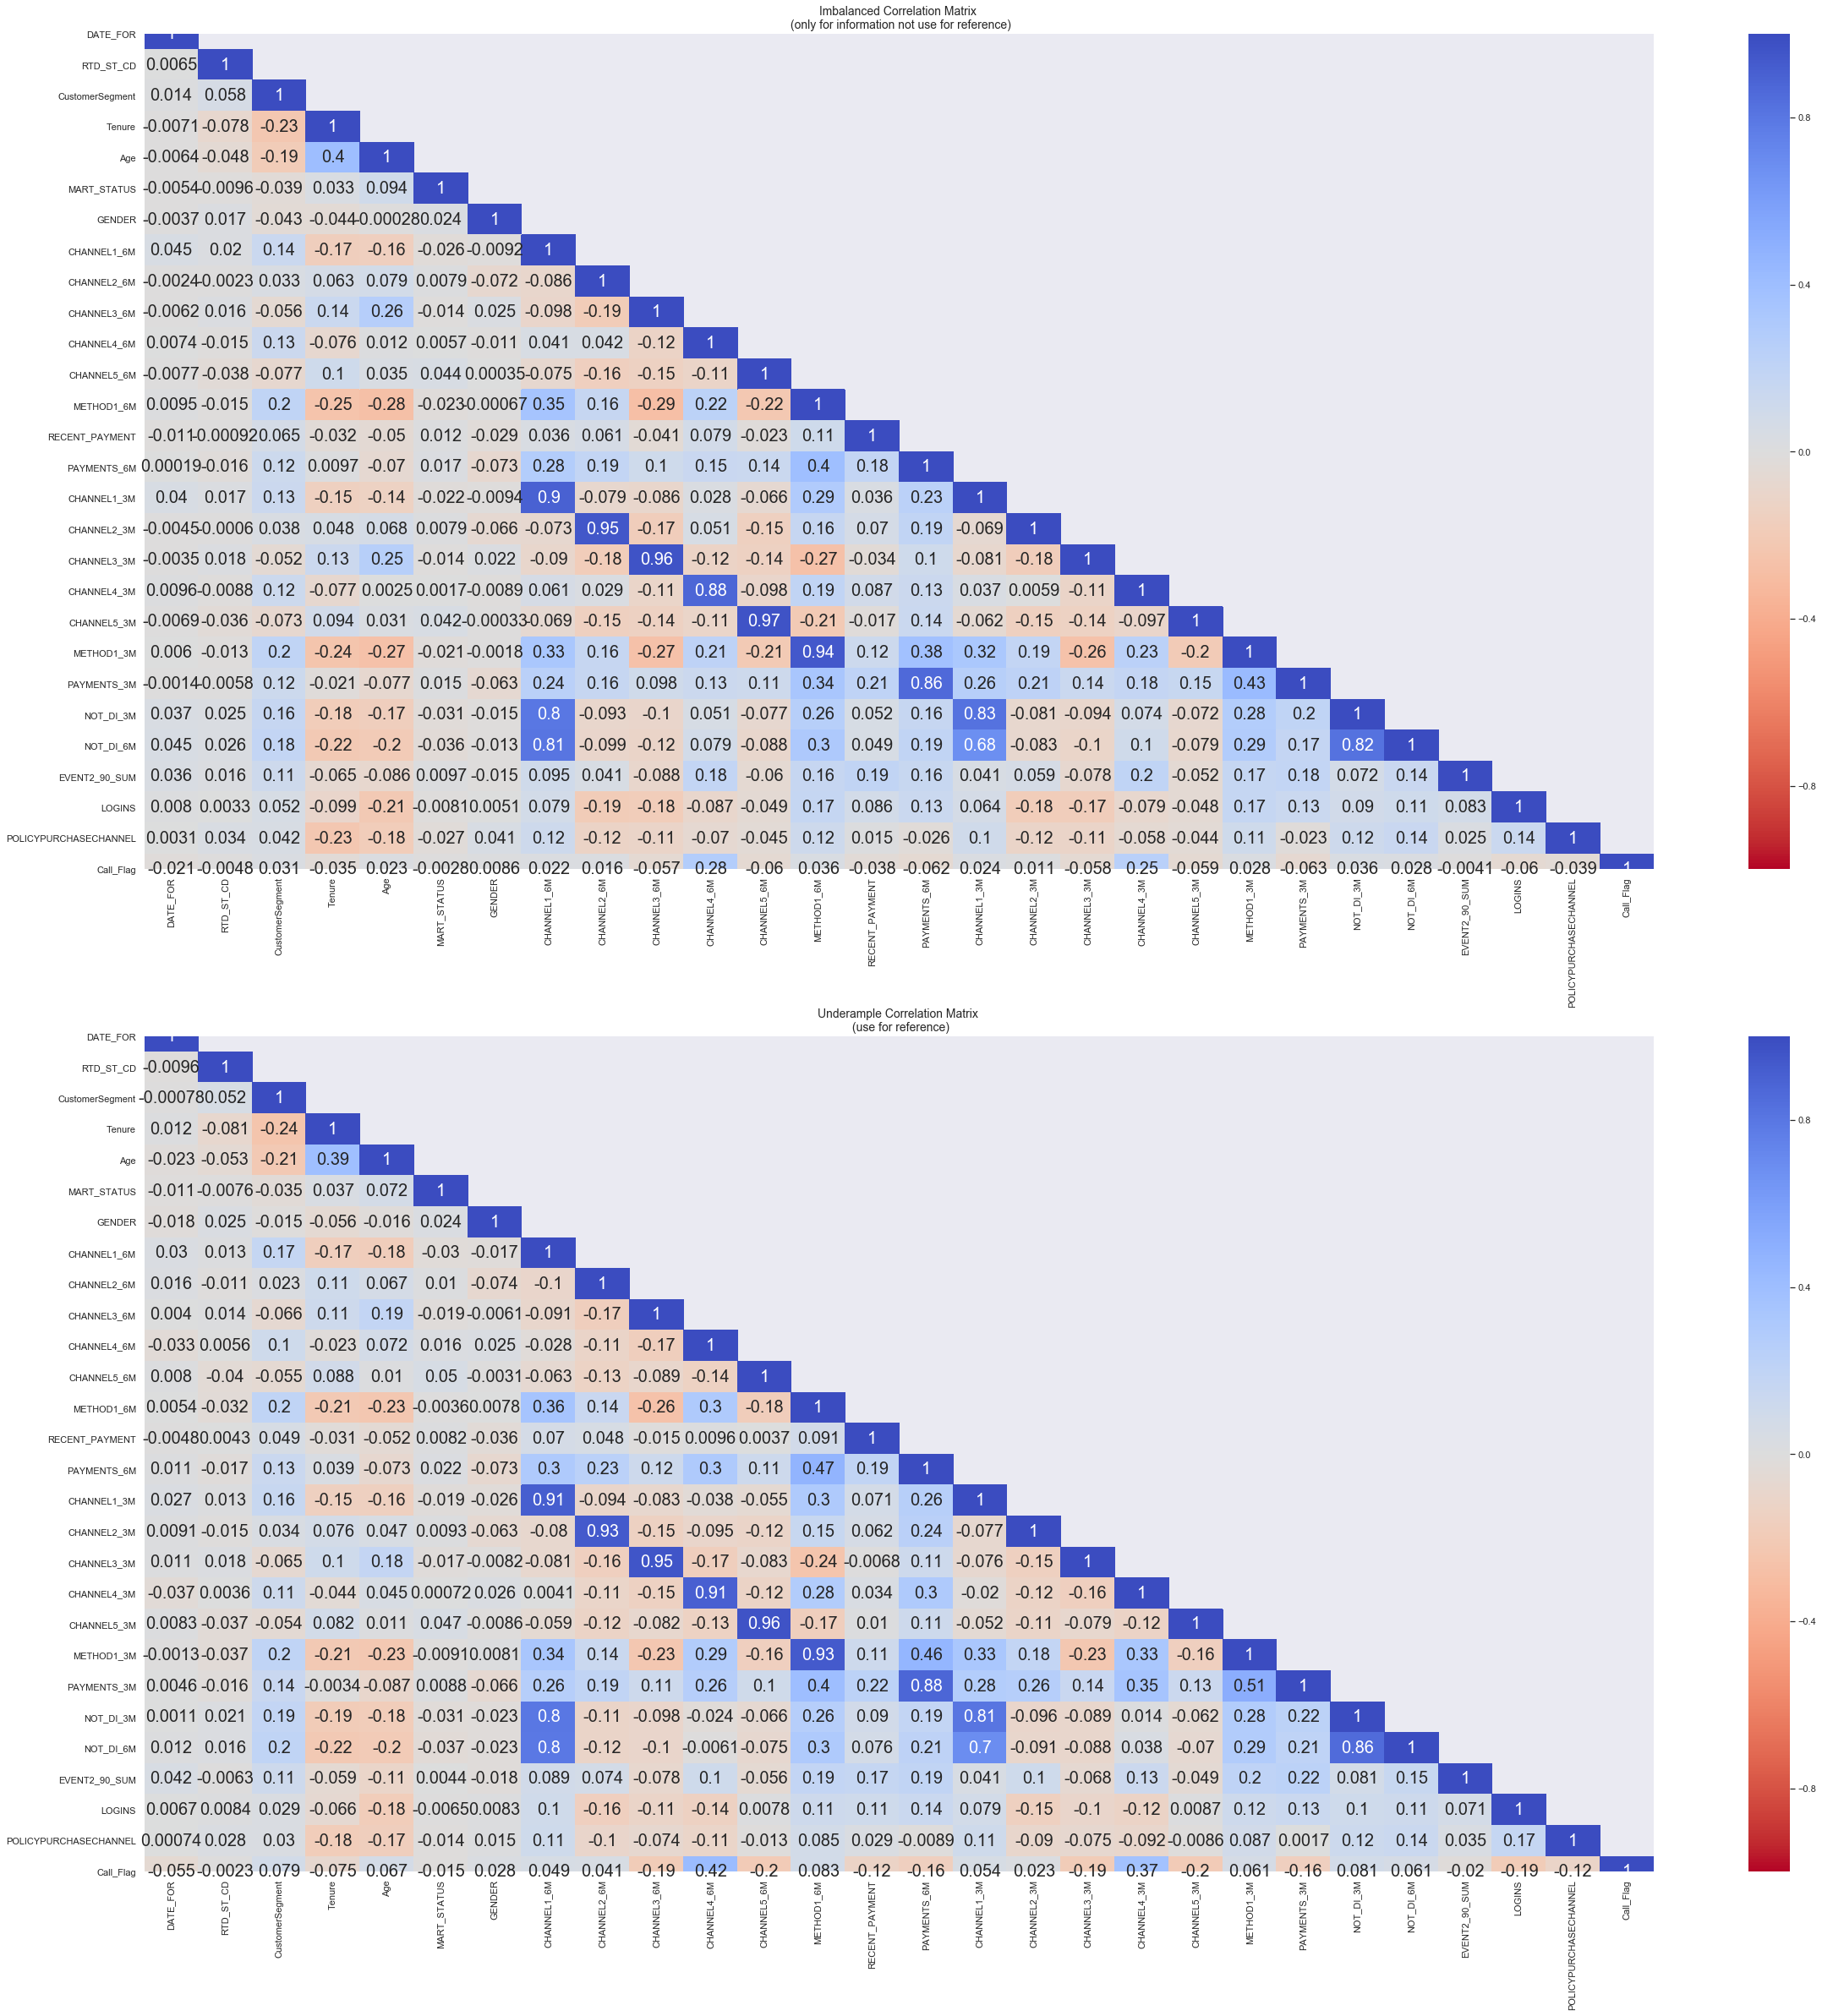

In [15]:
df1 = Data
df2 = new_df


f, (ax1, ax2) = plt.subplots(2, 1, figsize=(40,40))
corr = df1.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(corr, mask=mask, cmap='coolwarm_r', vmax=1, vmin=-1, annot_kws={'size':20}, annot=True, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (only for information not use for reference)", fontsize=14)

sub_sample_corr = df2.corr()
mask = np.array(sub_sample_corr)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(sub_sample_corr, mask=mask, cmap='coolwarm_r', vmax=1, vmin=-1, annot_kws={'size':20}, annot=True, ax=ax2)
ax2.set_title('Underample Correlation Matrix \n (use for reference)', fontsize=14)


plt.show()


### Anomaly Detection
<a id="anomaly"></a>

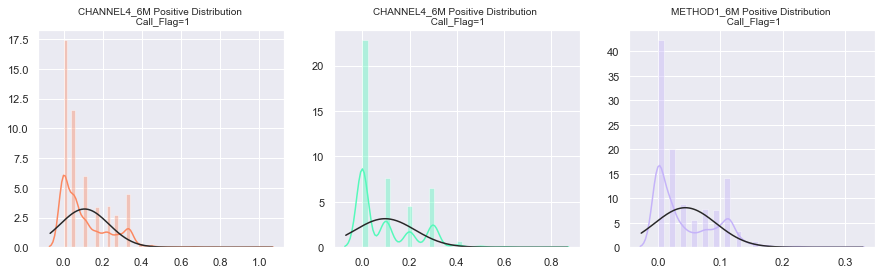

In [16]:
## Visualize Distribution             

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15, 4))

a = new_df['CHANNEL4_6M'].loc[new_df['Call_Flag'] == 1].values
sns.distplot(a,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('CHANNEL4_6M Positive Distribution \n Call_Flag=1', fontsize=10)

b = new_df['CHANNEL4_3M'].loc[new_df['Call_Flag'] == 1].values
sns.distplot(b,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('CHANNEL4_6M Positive Distribution \n Call_Flag=1', fontsize=10)


c = new_df['METHOD1_6M'].loc[new_df['Call_Flag'] == 1].values
sns.distplot(c,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('METHOD1_6M Positive Distribution \n Call_Flag=1', fontsize=10)

plt.show()



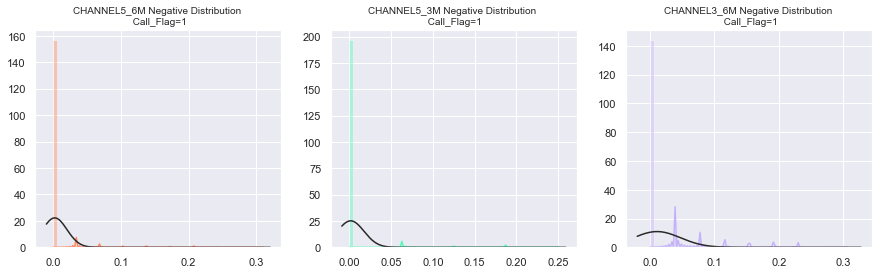

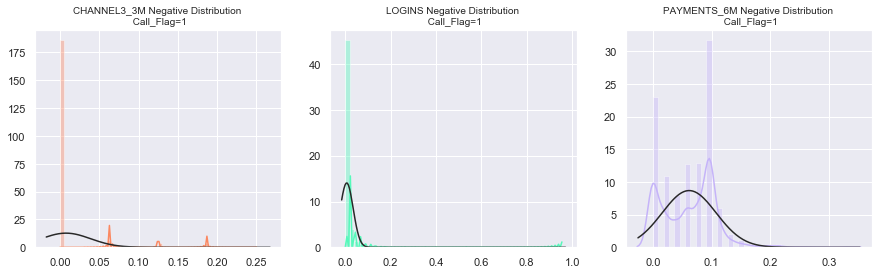

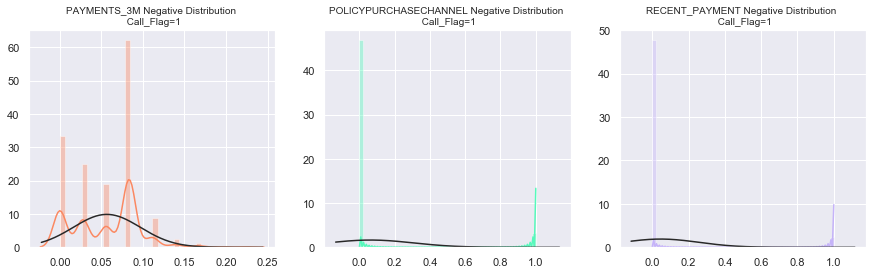

In [17]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15, 4))
# CHANNEL3_6M     RECENT_PAYMENT   PAYMENTS_3M
a = new_df['CHANNEL5_6M'].loc[new_df['Call_Flag'] == 1].values
sns.distplot(a,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('CHANNEL5_6M Negative Distribution \n Call_Flag=1', fontsize=10)

b = new_df['CHANNEL5_3M'].loc[new_df['Call_Flag'] == 1].values
sns.distplot(b,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('CHANNEL5_3M Negative Distribution \n Call_Flag=1', fontsize=10)


c = new_df['CHANNEL3_6M'].loc[new_df['Call_Flag'] == 1].values
sns.distplot(c,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('CHANNEL3_6M Negative Distribution \n Call_Flag=1', fontsize=10)

plt.show()

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15, 4))
# CHANNEL3_6M     RECENT_PAYMENT   PAYMENTS_3M
a = new_df['CHANNEL3_3M'].loc[new_df['Call_Flag'] == 1].values
sns.distplot(a,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('CHANNEL3_3M Negative Distribution \n Call_Flag=1', fontsize=10)

b = new_df['LOGINS'].loc[new_df['Call_Flag'] == 1].values
sns.distplot(b,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('LOGINS Negative Distribution \n Call_Flag=1', fontsize=10)


c = new_df['PAYMENTS_6M'].loc[new_df['Call_Flag'] == 1].values
sns.distplot(c,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('PAYMENTS_6M Negative Distribution \n Call_Flag=1', fontsize=10)

plt.show()

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15, 4))
# CHANNEL3_6M     RECENT_PAYMENT   PAYMENTS_3M
a = new_df['PAYMENTS_3M'].loc[new_df['Call_Flag'] == 1].values
sns.distplot(a,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('PAYMENTS_3M Negative Distribution \n Call_Flag=1', fontsize=10)

b = new_df['POLICYPURCHASECHANNEL'].loc[new_df['Call_Flag'] == 1].values
sns.distplot(b,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('POLICYPURCHASECHANNEL Negative Distribution \n Call_Flag=1', fontsize=10)


c = new_df['RECENT_PAYMENT'].loc[new_df['Call_Flag'] == 1].values
sns.distplot(c,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('RECENT_PAYMENT Negative Distribution \n Call_Flag=1', fontsize=10)

plt.show()


Above analysis over 3 most important features for each positive and negative correlation, shows that 2+9 features of 
- **For Positive Corr:**
- CHANNEL4_6M  with 0.43
- CHANNEL4_3M with 0.38


- **For Negative Corr:**
- CHANNEL5_6M with -.21
- CHANNEL5_3M with -.21
- CHANNEL3_6M with -.19
- CHANNEL3_3M with-.19
- LOGINS with -.18
- PAYMENTS_6M with -.15
- PAYMENTS_3M with -.15
- POLICYPURCHASECHANNEL with -.13
- RECENT_PAYMENT with -.12

have more impact on Call_Flag.
Therefore going through next phase which is outlier romoval, a function has been written to get these columns and detect and remove the outliers.

### Removing Outliers
<a id="Outliers"></a>
In statistics, an outlier is an observation point that is distant from other observations. There are two types of analysis to find the outliers- Uni-variate(one variable outlier analysis) and Multi-variate(two or more variable outlier analysis).

There are methods based on visualizations, statistics, clustering algorithms to detect outliers/anomalies from dataset. Here I used a method called IQR score.

**IQR score:** The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1.
In other words, the IQR is the first quartile subtracted from the third quartile; these quartiles can be clearly seen on a box plot on the data.
It is a measure of the dispersion similar to standard deviation or variance, but is much more robust against outliers. This method is used with Box plot visualization method.

In our case, sometimes I used other numbers than 25 or 75 in order to limit numbers of removed outliers from dataset. This is particularly used when there is a high skewness in distribution of each feature, therefore removing 25 lower or 75 higher would not be useful to detect outliers.


In [18]:
new_df_bkp = new_df.copy()
def outlier_removal(df, col, class_t, lower_q=25, higher_q=75):
    col_target = df[col].loc[df[class_t] == 1].values
    q25, q75 = np.percentile(col_target, lower_q), np.percentile(col_target, higher_q)
    print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
    col_iqr = q75 - q25
    print('iqr: {}'.format(col_iqr))

    col_cut_off = col_iqr * 1.5
    col_lower, col_upper = q25 - col_cut_off, q75 + col_cut_off
    print('{} Cut Off: {}'.format(col, col_cut_off))
    print('{} Lower: {}'.format(col, col_lower))
    print('{} Upper: {}'.format(col, col_upper))

    outliers = [x for x in col_target if x < col_lower or x > col_upper]
    print('Feature {} Outliers for Call_Flag Class: {}'.format(col, len(outliers)))
    print('{} outliers:{}'.format(col, outliers))
    print('=============================')
    return df.drop(df[(df[col] > col_upper) | (df[col] < col_lower)].index)

new_df = outlier_removal(new_df, 'CHANNEL4_6M', class_t='Call_Flag')
new_df = outlier_removal(new_df, 'CHANNEL4_3M', class_t='Call_Flag')
new_df = outlier_removal(new_df, 'CHANNEL5_6M', class_t='Call_Flag')
new_df = outlier_removal(new_df, 'CHANNEL5_3M', class_t='Call_Flag')

new_df = outlier_removal(new_df, 'CHANNEL3_6M', class_t='Call_Flag',lower_q=5, higher_q=95)
new_df = outlier_removal(new_df, 'CHANNEL3_3M', class_t='Call_Flag',lower_q=5, higher_q=95)
new_df = outlier_removal(new_df, 'LOGINS', class_t='Call_Flag',lower_q=5, higher_q=95)
new_df = outlier_removal(new_df, 'PAYMENTS_6M', class_t='Call_Flag')
new_df = outlier_removal(new_df, 'PAYMENTS_3M', class_t='Call_Flag')
new_df = outlier_removal(new_df, 'POLICYPURCHASECHANNEL', class_t='Call_Flag',lower_q=5, higher_q=95)
new_df = outlier_removal(new_df, 'RECENT_PAYMENT', class_t='Call_Flag',lower_q=5, higher_q=95)


Quartile 25: 0.0 | Quartile 75: 0.16666666666666666
iqr: 0.16666666666666666
CHANNEL4_6M Cut Off: 0.25
CHANNEL4_6M Lower: -0.25
CHANNEL4_6M Upper: 0.41666666666666663
Feature CHANNEL4_6M Outliers for Call_Flag Class: 56
CHANNEL4_6M outliers:[0.6666666666666666, 0.4444444444444444, 0.4444444444444444, 0.4444444444444444, 0.6666666666666666, 0.7777777777777777, 0.7777777777777777, 0.4444444444444444, 0.5555555555555556, 0.6666666666666666, 0.5555555555555556, 1.0, 1.0, 1.0, 1.0, 0.6666666666666666, 0.6666666666666666, 0.4444444444444444, 0.4444444444444444, 0.4444444444444444, 0.7222222222222222, 0.4444444444444444, 0.5555555555555556, 0.4444444444444444, 0.4444444444444444, 0.4444444444444444, 0.7777777777777777, 0.4444444444444444, 0.4444444444444444, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.4444444444444444, 0.4444444444444444, 0.4444444444444444, 0.611111111111111, 0.5555555555555556, 0.4444444444444444, 0.5555555555555556, 0.5, 0.444444444444

Next step the correlation matrix for new Dataframe (after removind outliers) will be checked.

We will observe that, correlation of impactful features have been slightly adjusted to show more variance with target class. 

In [19]:
new_df['Call_Flag'].value_counts()

1.0    4209
0.0    3028
Name: Call_Flag, dtype: int64

### Dimensionality Reduction:
<a id="clustering"></a>
One way to visualize the clusters of data in the data is using manifold learning and clustering approach.

T-SNE algorithm can pretty accurately cluster the cases along the target class (Call_Flag) in our dataset.
Although the subsample is pretty small, the T-SNE algorithm is able to detect clusters pretty accurately in every scenario (I shuffle the dataset before running T-SNE). However T-SNE doesn't represent reality in its visualization such as euclidean distance between data points, but it calculates and detects conditional probability between data points.

**PCA:** Linear dimensionality reduction using Singular Value Decomposition (SVD) of the data to project it to a lower dimensional space. The input data is centered but not scaled for each feature before applying the SVD.
*/Note*/ that this class of dimensionality reduction algorithm does not support sparse input. The outcome of algorithm preservs euclidean distance and overal structure of the dataset.

**Truncated SVD:** This transformer performs linear dimensionality reduction by means of truncated singular value decomposition (SVD). Contrary to PCA, this estimator does not center the data before computing the singular value decomposition. This means it can work with scipy.sparse matrices efficiently.

This gives us an indication that further predictive models will perform pretty well in separating Call_Flag cases from non-Call_Flag cases.

For more information: https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b

In [20]:
# New_df is from the random undersample data (fewer instances)


X = new_df.drop('Call_Flag', axis=1)
y = new_df['Call_Flag']


# T-SNE Implementation
t0 = time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time()
print("T-SNE took {:.2f} s".format(t1 - t0))

# PCA Implementation
t0 = time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time()
print("Truncated SVD took {:.2} s".format(t1 - t0))




T-SNE took 37.61 s
PCA took 0.031 s
Truncated SVD took 0.023 s


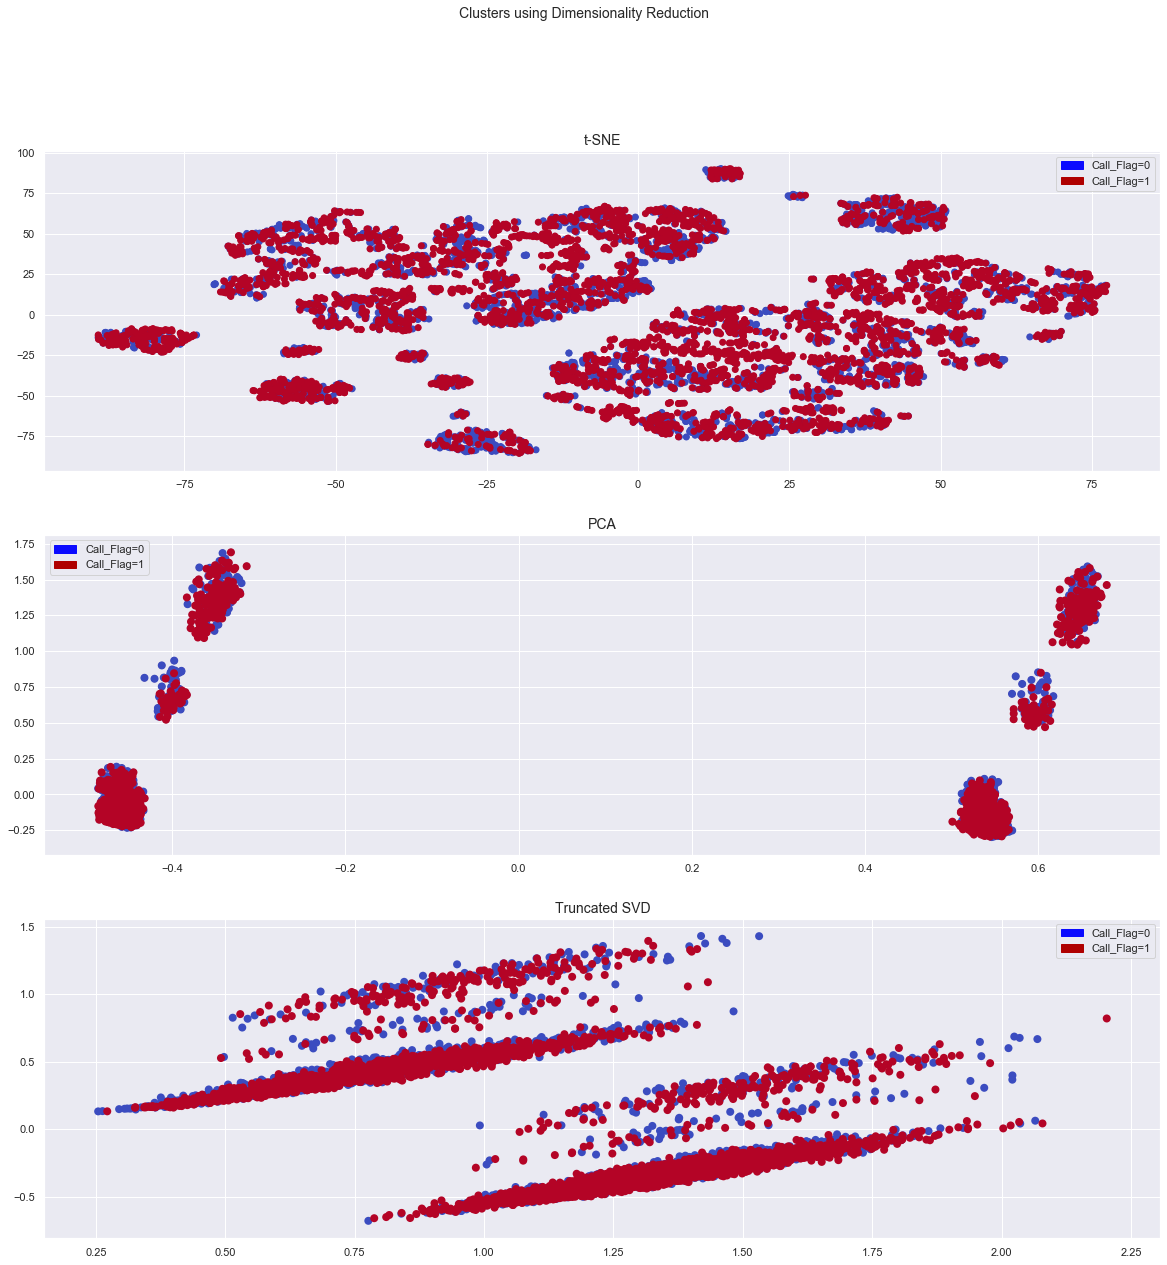

In [21]:
## Plotting Clusters


f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20,20))
# labels = ['No Call_Flag', 'Call_Flag']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='Call_Flag=0')
red_patch = mpatches.Patch(color='#AF0000', label='Call_Flag=1')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='Call_Flag=0', linewidths=1,
           s=20, facecolors='none')
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Call_Flag=1', linewidths=1)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], marker='o',c=(y == 0), cmap='coolwarm', label='Call_Flag=0', linewidths=1,facecolors='none')
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Call_Flag=1', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='Call_Flag=0', linewidths=2,
           s=1, facecolors='none')
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Call_Flag=1', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()


## Building Machine Learning Model
### Creating Estimators
<a id="classifiers"></a>
In this section, we build classifiers for already randomly resampled data. It is always good to try multiple classifiers for a specific problem. Before I mentioned that some classifers are robust against imbalanced data such as tree-based estimators.
In this section we try:

- Logisitic Regression
- K-Nearest Neighbor
- Support Vector Classifier
- Decision Tree Classifier
- Random Forest Classifier
- Multi Layer Perceptron Classifier

In [22]:
# Undersampling before cross validating (prone to overfit)

X = new_df.drop('Call_Flag', axis=1)
y = new_df['Call_Flag']
# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values
# Let's implement simple classifiers

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier":RandomForestClassifier(),
    "MLPClassifier":MLPClassifier()
}
# Wow our scores are getting even high scores even when applying cross validation.
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")




Classifiers:  LogisticRegression Has a training score of 76.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 65.0 % accuracy score
Classifiers:  SVC Has a training score of 75.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 69.0 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 76.0 % accuracy score
Classifiers:  MLPClassifier Has a training score of 76.0 % accuracy score


## Hyper-parameter tuning
<a id="hyper"></a>

For next step we select top two classifers which performed better in previous section.

It seems, Logistic Regression and Random Forest would be two good choices since one of them is parametric model and the other one non-parametric. We will see how we can tune the model based on different parameters during training and then select the best choice for further steps.

In [23]:

# Use GridSearchCV to find the best parameters.


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

# Random Forest Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(RandomForestClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_


# MLP Classifier
# solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(20, 20), random_state=1

In [24]:
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

####
print('\nROC AUC Score:')
print('Logistic Regression: ', roc_auc_score(y_train, log_reg.predict(X_train)))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_clf.predict(X_train)))

Logistic Regression Cross Validation Score:  76.28%
DecisionTree Classifier Cross Validation Score 75.75%

ROC AUC Score:
Logistic Regression:  0.7503974772301018
Decision Tree Classifier:  0.7438425659193155


!!!!!!!!Undersampling during 

In [25]:
X_train_org.shape

(103422, 27)

### Resampling Strategies
<a id="strategies"></a>

In this section, we go through more details of resampling strategies by using two well-known subsampling methods. We would use them to get a more precise subsamples of dataset before training the models. 

**NearMiss:** NearMiss is an under-sampling technique. Instead of resampling the Minority class, using a distance, this will make the majority class equal to minority class.


**AllKNN:** AllKNN algorithm is another undersampling technique which uses flexible number of neighbors around data points of class of minority. The number of neighbors of the internal nearest neighbors algorithm is increased at each iteration, therefore it shows promising results rather than other goup of techniques based on nearest neighbor algorithms.


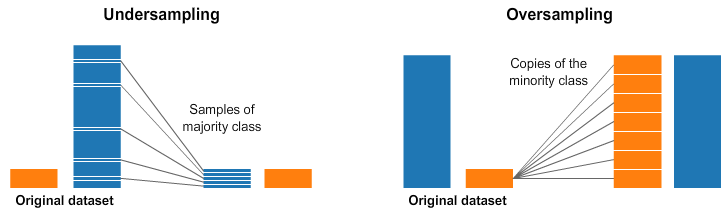





In [26]:
# We will undersample during cross validating

# construct from the original datafram (before random undersampling)
undersample_X = Data.drop('Call_Flag', axis=1)
undersample_y = Data['Call_Flag']

for train_index, test_index in skf.split(undersample_X, undersample_y):
    print("Train:", train_index, "Test:", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]
    
undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values 

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Building New Logistic Regression to use for the undersampling pipeline
# based on the new X and y train
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(undersample_Xtrain, undersample_ytrain)
# We automatically get the logistic regression with the best parameters.
log_reg_2 = grid_log_reg.best_estimator_

# Implementing NearMiss Technique 
# Distribution of NearMiss (Just to see how it distributes the labels we won't use these variables)
X_nearmiss, y_nearmiss = RandomUnderSampler().fit_sample(undersample_X.values, undersample_y.values)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))
# Cross Validating the right way

for train, test in skf.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(RandomUnderSampler(), log_reg_2) # SMOTE happens during Cross Validation not before..
#     undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority', version=3), log_reg_2) # SMOTE happens during Cross Validation not before..
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])
    
    undersample_accuracy.append(undersample_pipeline.score(X_train_org[test], y_train_org[test]))
    undersample_precision.append(precision_score(y_train_org[test], undersample_prediction))
    undersample_recall.append(recall_score(y_train_org[test], undersample_prediction))
    undersample_f1.append(f1_score(y_train_org[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(y_train_org[test], undersample_prediction))




Train: [ 25632  25633  25634 ... 129274 129275 129276] Test: [    0     1     2 ... 32738 32752 32762]
Train: [     0      1      2 ... 129274 129275 129276] Test: [25632 25633 25634 ... 68975 68988 69025]
Train: [     0      1      2 ... 129274 129275 129276] Test: [51271 51272 51273 ... 92968 93017 93021]
Train: [     0      1      2 ... 129274 129275 129276] Test: [ 76901  76902  76903 ... 113919 113992 114043]
Train: [     0      1      2 ... 113919 113992 114043] Test: [102926 102927 102928 ... 129274 129275 129276]
NearMiss Label Distribution: Counter({0.0: 4725, 1.0: 4725})


In [27]:
undersample_accuracy_2 = []
undersample_precision_2 = []
undersample_recall_2 = []
undersample_f1_2 = []
undersample_auc_2 = []

# Implementing AllKNN Technique 
# Distribution of AllKNN (Just to see how it distributes the labels we won't use these variables)
X_nearmiss, y_nearmiss = TomekLinks().fit_sample(undersample_X.values, undersample_y.values)
print('AllKNN Label Distribution: {}'.format(Counter(y_nearmiss)))
# Cross Validating the right way

for train, test in skf.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(TomekLinks(sampling_strategy='majority'), log_reg_2) # SMOTE happens during Cross Validation not before..
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])
    
    undersample_accuracy_2.append(undersample_pipeline.score(X_train_org[test], y_train_org[test]))
    undersample_precision_2.append(precision_score(y_train_org[test], undersample_prediction))
    undersample_recall_2.append(recall_score(y_train_org[test], undersample_prediction))
    undersample_f1_2.append(f1_score(y_train_org[test], undersample_prediction))
    undersample_auc_2.append(roc_auc_score(y_train_org[test], undersample_prediction))

AllKNN Label Distribution: Counter({0.0: 122835, 1.0: 4725})


## Testing
### Performance Measurements
<a id="testing"></a>
After finding tuned model, we can test the model against:


**- Cross Validation Score:**
In Cross validation score we calculate true measurements/all measurements. In our case (TP+TN)/TP+TN+FP+FN.
Since cross validation score returns a list of 5 numbers, we need to get mean of the 5 values to calculate final score

![image.png](attachment:image.png)


**- ROC AUC Score:**
ROC Area Under Curve(AUC), calculates the area below the ROC curve of the performance. For a good classifier this value is close to 1 and for a poor one it will close to 0.5

y_pred_log_reg = log_reg.predict(X_test)
roc_auc_score(y_test, y_pred_log_reg)

In [29]:
print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.72      0.64      0.67       603
         1.0       0.76      0.82      0.79       845

    accuracy                           0.74      1448
   macro avg       0.74      0.73      0.73      1448
weighted avg       0.74      0.74      0.74      1448



In [30]:
confusion_matrix(y_test, y_pred_log_reg)

array([[385, 218],
       [153, 692]], dtype=int64)

In [31]:
# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")
tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

####
print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('RandomForest Regression: ', roc_auc_score(y_train, tree_pred))

Logistic Regression:  0.8371846231168099
RandomForest Regression:  0.7408414136337449


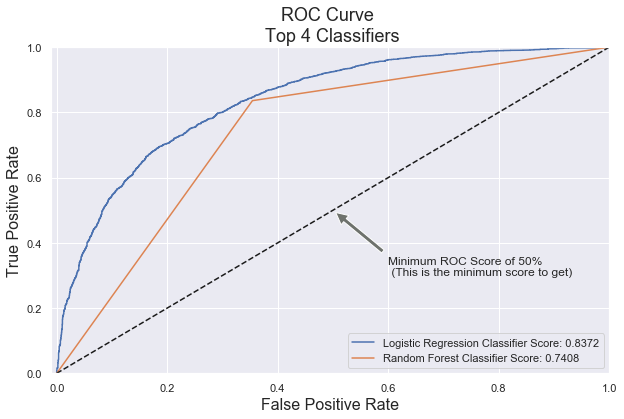

In [39]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(10,6))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, tree_fpr, tree_tpr)
plt.show()

In [33]:
precision, recall, threshold = precision_recall_curve(y_train, log_reg_pred)

In [34]:
y_pred = log_reg.predict(X_train)

# Overfitting Case
print('---' * 45)
print('Overfitting: \n')
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('---' * 45)

# How it should look like after subsampling with Near Miss
print('---' * 45)
print('How it should be:\n')
print("Accuracy Score: {:.2f}".format(np.mean(undersample_accuracy)))
print("Precision Score: {:.2f}".format(np.mean(undersample_precision)))
print("Recall Score: {:.2f}".format(np.mean(undersample_recall)))
print("F1 Score: {:.2f}".format(np.mean(undersample_f1)))
print('---' * 45)

# How it should look like after subsampling with All KNN
print('---' * 45)
print('How it should be:\n')
print("Accuracy Score: {:.2f}".format(np.mean(undersample_accuracy_2)))
print("Precision Score: {:.2f}".format(np.mean(undersample_precision_2)))
print("Recall Score: {:.2f}".format(np.mean(undersample_recall_2)))
print("F1 Score: {:.2f}".format(np.mean(undersample_f1_2)))
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------
Overfitting: 

Accuracy Score: 0.77
Precision Score: 0.77
Recall Score: 0.85
F1 Score: 0.81
---------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------
How it should be:

Accuracy Score: 0.74
Precision Score: 0.09
Recall Score: 0.64
F1 Score: 0.15
---------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------
How it should be:

Accuracy Score: 0.96
Precision Score: 0.00
Recall Score: 0.00
F1 Score: 0.00
------------------------------------

In [35]:
undersample_y_score = log_reg.decision_function(X_train_org)

In [36]:
undersample_average_precision = average_precision_score(y_train_org, undersample_y_score)

print('Average precision-recall score: {0:0.2f}'.format(undersample_average_precision))

Average precision-recall score: 0.25


Text(0.5, 1.0, 'UnderSampling Precision-Recall curve: \n Average Precision-Recall Score =0.25')

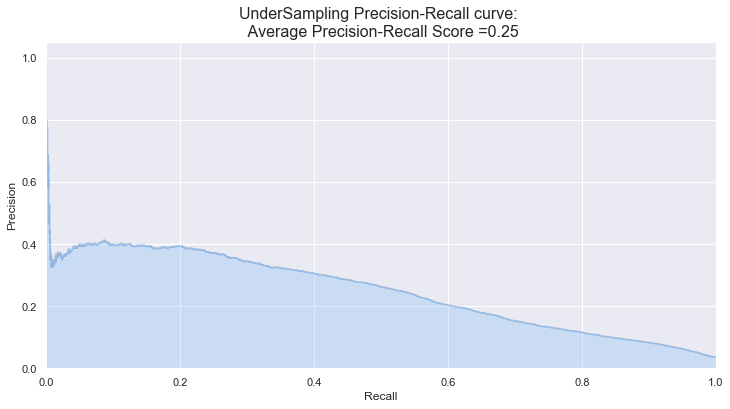

In [37]:
fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(y_train_org, undersample_y_score)

plt.step(recall, precision, color='#004a93', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#48a6ff')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('UnderSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          undersample_average_precision), fontsize=16)